<a href="https://colab.research.google.com/github/techwack/blind-indoor-object-detection/blob/main/blindobjectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
!pip install kaggle

In [3]:
from tqdm.notebook import tqdm

In [4]:
!pip install gTTS

In [5]:
from gtts import gTTS
from IPython.display import Audio, display

In [6]:
def text_to_speech(text, filename='output.mp3'):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)
    return filename


In [7]:
from ultralytics import YOLO
print("YOLOv8 installed successfully!")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8 installed successfully!


In [8]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dj0535","key":"9caddce2c584c492b0cb4de43192d921"}'}

In [9]:
# Create a directory for Kaggle
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the correct location
!cp kaggle.json ~/.kaggle/

# Change the permissions of the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d thepbordin/indoor-object-detection

Dataset URL: https://www.kaggle.com/datasets/thepbordin/indoor-object-detection
License(s): GNU Lesser General Public License 3.0
 99% 362M/367M [00:02<00:00, 183MB/s]
100% 367M/367M [00:02<00:00, 148MB/s]


In [11]:
!unzip indoor-object-detection.zip -d /content/indoor-object-detection

Archive:  indoor-object-detection.zip
  inflating: /content/indoor-object-detection/data.yaml  
  inflating: /content/indoor-object-detection/test/images/1003.png  
  inflating: /content/indoor-object-detection/test/images/1014.png  
  inflating: /content/indoor-object-detection/test/images/1015.png  
  inflating: /content/indoor-object-detection/test/images/1020.png  
  inflating: /content/indoor-object-detection/test/images/1021.png  
  inflating: /content/indoor-object-detection/test/images/1023.png  
  inflating: /content/indoor-object-detection/test/images/1026.png  
  inflating: /content/indoor-object-detection/test/images/1027.png  
  inflating: /content/indoor-object-detection/test/images/1028.png  
  inflating: /content/indoor-object-detection/test/images/1029.png  
  inflating: /content/indoor-object-detection/test/images/1032.png  
  inflating: /content/indoor-object-detection/test/images/1034.png  
  inflating: /content/indoor-object-detection/test/images/1040.png  
  infla

In [12]:
import os

# List the contents of the unzipped folder
os.listdir('/content/indoor-object-detection')

['data.yaml', 'test', 'train', 'valid']

In [13]:
# Check the contents of data.yaml
with open('/content/indoor-object-detection/data.yaml', 'r') as f:
    print(f.read())

train: /content/data/train/images
val: /content/data/valid/images
test: /content/data/test/images
nc: 10
names: 
- door
- cabinetDoor
- refrigeratorDoor
- window
- chair
- table
- cabinet
- couch
- openedDoor
- pole


In [14]:
import os

# List the contents of the train and valid directories
print("Train Images:", os.listdir('/content/indoor-object-detection/train/images'))
print("Train Labels:", os.listdir('/content/indoor-object-detection/train/labels'))
print("Valid Images:", os.listdir('/content/indoor-object-detection/valid/images'))
print("Valid Labels:", os.listdir('/content/indoor-object-detection/valid/labels'))
print("Test Images:", os.listdir('/content/indoor-object-detection/test/images'))

Train Images: ['76daa79117fc7d19.jpg', '610.png', '06d3587094d5c496.jpg', '0a76ce8df7ea43ba.jpg', '0c41800d0c91812f.jpg', 'DOR_S1_105.jpg', '58b547e7ce3ca583.jpg', '401d7aae63c3b63c.jpg', '0dc660f9d10b8e64.jpg', '7771c64fca6089d2.jpg', '63c54ace54e70f70.jpg', '27a6bcd97e626d69.jpg', 'a30d502fade25820.jpg', '0e759e74589524b3.jpg', '0fbe10829d6d74c7.jpg', '35168644edae9d03.jpg', 'DOR_S3_23.JPG', 'dbf426e1543cc41e.jpg', 'DOR_S1_116.jpg', 'c7ed2bf7831d135e.jpg', '00c2c198953fc6d6.jpg', 'd611a05b7a107509.jpg', '28e00ee6e869b29a.jpg', '88fa8f83a0d5703a.jpg', '68ad1ac2ca33c9d6.jpg', '8f24ccd5d86243b5.jpg', '0071e79693904a8f.jpg', 'b603a9d5511f2661.jpg', '0d6642763decf970.jpg', '84cb35f6bd724733.jpg', '00d82cf94121d6c1.jpg', '5f91ad235094ae04.jpg', '76c6d0cca62ba225.jpg', '38a7fa0a0fb6ffe6.jpg', '0c89be4d66633ce4.jpg', '24eb3cd134fae0aa.jpg', '57da1fb96266fe9d.jpg', '629678c55bd096a9.jpg', '1664c338a8380c25.jpg', '443866e9d68f90f3.jpg', '867.png', '0eb2c146387764c3.jpg', '8079dbbcb7d981dc.jpg'

In [16]:
# Python code to modify data.yaml
with open('/content/indoor-object-detection/data.yaml', 'w') as file:
    file.write("""train: /content/indoor-object-detection/train/images
val: /content/indoor-object-detection/valid/images
test: /content/indoor-object-detection/test/images
nc: 10
names:
  - door
  - cabinetDoor
  - refrigeratorDoor
  - window
  - chair
  - table
  - cabinet
  - couch
  - openedDoor
  - pole
""")


In [18]:
# Load the YOLO model
model = YOLO("yolov8n.pt")  # You can use a pre-trained model or specify another model variant (e.g., yolov8s.pt for a smaller model)

# Train the model
model.train(
    data='/content/indoor-object-detection/data.yaml',  # Path to the dataset YAML file
    epochs=70,  # Number of training epochs (you can adjust)
    imgsz=640,  # Image size
    batch=8,  # Batch size (adjust based on your GPU)
    workers=4,  # Number of workers for data loading
    lr0=0.001,  # Learning rate for the initial stage
    lrf=0.01,  # Learning rate final stage for warm-up and decay
)


Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/indoor-object-detection/data.yaml, epochs=70, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 14.2MB/s]


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.3MB/s]


AMP: checks passed ✅


train: Scanning /content/indoor-object-detection/train/labels... 1008 images, 120 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:00<00:00, 1922.09it/s]

train: New cache created: /content/indoor-object-detection/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/indoor-object-detection/valid/labels... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<00:00, 1194.27it/s]


val: New cache created: /content/indoor-object-detection/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      1.23G      1.717       3.63       1.56         24        640: 100%|██████████| 127/127 [00:29<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.12it/s]


                   all        230       1289      0.451      0.184      0.118     0.0649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      1.39G      1.601      2.665       1.47         96        640: 100%|██████████| 127/127 [00:26<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.41it/s]


                   all        230       1289      0.491      0.235       0.16     0.0846

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      1.22G      1.619      2.505       1.48         26        640: 100%|██████████| 127/127 [00:25<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.83it/s]

                   all        230       1289      0.538      0.218      0.189      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      1.27G      1.613      2.406      1.472         57        640: 100%|██████████| 127/127 [00:26<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.36it/s]


                   all        230       1289      0.523      0.245      0.193      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      1.33G      1.521      2.232      1.409         26        640: 100%|██████████| 127/127 [00:26<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


                   all        230       1289      0.596      0.238      0.241      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      1.28G      1.535      2.213      1.419         30        640: 100%|██████████| 127/127 [00:25<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]

                   all        230       1289      0.437      0.314      0.269      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      1.24G      1.513      2.173      1.403         50        640: 100%|██████████| 127/127 [00:25<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.13it/s]

                   all        230       1289      0.591      0.276      0.265      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      1.22G      1.498      2.065      1.387         52        640: 100%|██████████| 127/127 [00:25<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.74it/s]


                   all        230       1289       0.64       0.27      0.275      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      1.28G      1.503      2.034      1.393         17        640: 100%|██████████| 127/127 [00:25<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.01it/s]


                   all        230       1289      0.595      0.279      0.264      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      1.27G      1.473      1.951      1.374         44        640: 100%|██████████| 127/127 [00:25<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]

                   all        230       1289      0.508      0.284      0.281      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      1.26G      1.482      1.976      1.368         23        640: 100%|██████████| 127/127 [00:26<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.21it/s]


                   all        230       1289      0.565       0.33       0.28      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      1.25G      1.467      1.921      1.361         28        640: 100%|██████████| 127/127 [00:25<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.27it/s]

                   all        230       1289      0.665      0.287      0.309      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      1.25G      1.462      1.867      1.356         42        640: 100%|██████████| 127/127 [00:25<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.27it/s]

                   all        230       1289      0.569      0.289      0.299      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      1.16G      1.444       1.83      1.351         35        640: 100%|██████████| 127/127 [00:26<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.27it/s]


                   all        230       1289      0.651      0.282      0.295       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      1.21G      1.426      1.826      1.345         46        640: 100%|██████████| 127/127 [00:25<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.56it/s]


                   all        230       1289      0.558      0.341      0.306      0.176

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      1.21G      1.441      1.762      1.335         42        640: 100%|██████████| 127/127 [00:26<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.41it/s]


                   all        230       1289      0.394      0.334      0.314      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      1.27G      1.426      1.753      1.338         25        640: 100%|██████████| 127/127 [00:25<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]


                   all        230       1289      0.632      0.333      0.315      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      1.35G      1.401      1.689      1.318         34        640: 100%|██████████| 127/127 [00:25<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.59it/s]

                   all        230       1289      0.713      0.293      0.332      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      1.21G      1.416      1.719      1.325          4        640: 100%|██████████| 127/127 [00:25<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.97it/s]

                   all        230       1289      0.674      0.312      0.359      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      1.19G      1.399      1.656      1.308         24        640: 100%|██████████| 127/127 [00:25<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.47it/s]


                   all        230       1289      0.416      0.358      0.357      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      1.17G      1.391       1.67       1.31         53        640: 100%|██████████| 127/127 [00:25<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.37it/s]


                   all        230       1289      0.593       0.35      0.367      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      1.35G      1.395      1.618      1.305         36        640: 100%|██████████| 127/127 [00:25<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.39it/s]

                   all        230       1289      0.543      0.331      0.346      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      1.21G      1.368      1.619      1.294         25        640: 100%|██████████| 127/127 [00:26<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.58it/s]

                   all        230       1289      0.541      0.336      0.354      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      1.17G      1.388      1.608      1.304         64        640: 100%|██████████| 127/127 [00:25<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]

                   all        230       1289      0.493      0.296      0.351      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      1.29G      1.369      1.566      1.285         13        640: 100%|██████████| 127/127 [00:25<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.92it/s]

                   all        230       1289      0.648      0.331      0.368      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      1.29G      1.363      1.532      1.281         33        640: 100%|██████████| 127/127 [00:25<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.64it/s]


                   all        230       1289      0.476       0.35      0.371      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      1.27G      1.369      1.538      1.278         14        640: 100%|██████████| 127/127 [00:26<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.13it/s]

                   all        230       1289      0.577      0.325      0.353      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      1.23G      1.338      1.477      1.266         13        640: 100%|██████████| 127/127 [00:25<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.65it/s]

                   all        230       1289      0.459      0.378      0.372      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      1.16G      1.353      1.486      1.283         22        640: 100%|██████████| 127/127 [00:25<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.90it/s]

                   all        230       1289       0.45      0.346      0.356      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      1.22G      1.347        1.5       1.28         32        640: 100%|██████████| 127/127 [00:25<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]

                   all        230       1289      0.629      0.309      0.382      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      1.24G      1.348      1.484      1.268         42        640: 100%|██████████| 127/127 [00:26<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.56it/s]

                   all        230       1289      0.584      0.335        0.4      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      1.22G       1.31      1.399      1.244         37        640: 100%|██████████| 127/127 [00:26<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.50it/s]

                   all        230       1289      0.577      0.401      0.482      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      1.23G      1.321      1.402      1.249         62        640: 100%|██████████| 127/127 [00:26<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.05it/s]


                   all        230       1289      0.585      0.372      0.374      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      1.27G      1.331      1.397      1.255         71        640: 100%|██████████| 127/127 [00:26<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.71it/s]

                   all        230       1289      0.479        0.5      0.442      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      1.29G      1.295      1.367      1.239         34        640: 100%|██████████| 127/127 [00:26<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.61it/s]


                   all        230       1289      0.463      0.472      0.413      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      1.33G      1.311      1.375      1.242         52        640: 100%|██████████| 127/127 [00:25<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.92it/s]

                   all        230       1289      0.441      0.505      0.411      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70       1.4G        1.3      1.365      1.242         50        640: 100%|██████████| 127/127 [00:25<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.53it/s]

                   all        230       1289      0.394      0.539      0.407      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      1.24G      1.299      1.368      1.245         28        640: 100%|██████████| 127/127 [00:25<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.49it/s]

                   all        230       1289      0.482      0.462      0.388       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      1.34G      1.295      1.345      1.239         52        640: 100%|██████████| 127/127 [00:25<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.22it/s]


                   all        230       1289      0.418      0.486      0.432      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      1.21G      1.283      1.351      1.233         43        640: 100%|██████████| 127/127 [00:26<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.37it/s]

                   all        230       1289      0.568       0.41       0.45      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      1.21G      1.274      1.309      1.224         51        640: 100%|██████████| 127/127 [00:25<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.77it/s]

                   all        230       1289      0.476      0.465      0.419      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      1.21G      1.249      1.294       1.22         28        640: 100%|██████████| 127/127 [00:25<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.30it/s]


                   all        230       1289      0.505      0.421      0.397      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      1.28G      1.282      1.296      1.227         25        640: 100%|██████████| 127/127 [00:25<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.48it/s]

                   all        230       1289      0.362      0.508      0.399      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      1.26G      1.263      1.278      1.225         46        640: 100%|██████████| 127/127 [00:26<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.56it/s]

                   all        230       1289      0.474      0.513      0.451      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70       1.2G      1.259      1.242      1.212         18        640: 100%|██████████| 127/127 [00:25<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


                   all        230       1289      0.561      0.423      0.413      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70       1.3G      1.264      1.292      1.222         25        640: 100%|██████████| 127/127 [00:26<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.28it/s]

                   all        230       1289      0.618      0.389        0.5      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      1.24G      1.263      1.263      1.224         22        640: 100%|██████████| 127/127 [00:26<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.51it/s]

                   all        230       1289      0.444      0.484      0.438      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      1.23G      1.249      1.226      1.209         20        640: 100%|██████████| 127/127 [00:25<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


                   all        230       1289      0.528      0.465      0.458       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      1.31G      1.239      1.195      1.197         42        640: 100%|██████████| 127/127 [00:26<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.38it/s]

                   all        230       1289      0.427      0.526      0.424       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      1.22G      1.256      1.234      1.211         57        640: 100%|██████████| 127/127 [00:26<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.70it/s]

                   all        230       1289      0.465       0.37      0.412      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      1.28G       1.24      1.223      1.207         60        640: 100%|██████████| 127/127 [00:25<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]


                   all        230       1289      0.369      0.439      0.417      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      1.22G      1.236      1.189      1.191         15        640: 100%|██████████| 127/127 [00:26<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.36it/s]

                   all        230       1289      0.534      0.354      0.414      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      1.25G       1.21      1.175      1.187         26        640: 100%|██████████| 127/127 [00:26<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.47it/s]

                   all        230       1289      0.421      0.429      0.421      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      1.36G       1.23      1.169      1.192         35        640: 100%|██████████| 127/127 [00:26<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.66it/s]

                   all        230       1289      0.669      0.398      0.462      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70       1.3G      1.213      1.164      1.188         40        640: 100%|██████████| 127/127 [00:25<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]

                   all        230       1289      0.486      0.467      0.441      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      1.31G      1.206      1.139      1.175         36        640: 100%|██████████| 127/127 [00:26<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.74it/s]

                   all        230       1289       0.48        0.5      0.455       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70       1.2G        1.2      1.158      1.185         30        640: 100%|██████████| 127/127 [00:25<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


                   all        230       1289      0.547      0.468       0.47      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      1.24G      1.202      1.143      1.186         85        640: 100%|██████████| 127/127 [00:26<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.02it/s]

                   all        230       1289      0.499      0.491      0.444      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      1.16G      1.206      1.098      1.181         38        640: 100%|██████████| 127/127 [00:25<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.53it/s]

                   all        230       1289      0.492      0.491      0.472      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      1.32G      1.197      1.123      1.173         41        640: 100%|██████████| 127/127 [00:26<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


                   all        230       1289      0.517      0.463      0.451      0.266
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      1.16G      1.211      1.145      1.204         24        640: 100%|██████████| 127/127 [00:26<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


                   all        230       1289      0.344      0.531      0.436      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      1.15G      1.162      1.049      1.175         16        640: 100%|██████████| 127/127 [00:25<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.56it/s]


                   all        230       1289      0.445      0.519      0.442      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      1.17G      1.169       1.02      1.175         31        640: 100%|██████████| 127/127 [00:25<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


                   all        230       1289      0.497      0.391      0.442      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      1.11G      1.155      1.011      1.164          6        640: 100%|██████████| 127/127 [00:25<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.02it/s]

                   all        230       1289      0.545      0.463      0.461      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      1.16G      1.132     0.9662      1.148         11        640: 100%|██████████| 127/127 [00:25<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.51it/s]


                   all        230       1289      0.404      0.512      0.435      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      1.16G      1.149     0.9894       1.16         10        640: 100%|██████████| 127/127 [00:25<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.48it/s]

                   all        230       1289      0.438      0.542      0.452      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      1.17G      1.141     0.9645      1.157         22        640: 100%|██████████| 127/127 [00:25<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.86it/s]

                   all        230       1289       0.47      0.499      0.445      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      1.13G      1.131     0.9569      1.147         65        640: 100%|██████████| 127/127 [00:25<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.52it/s]

                   all        230       1289      0.461      0.501      0.453      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      1.16G       1.13     0.9216      1.145         27        640: 100%|██████████| 127/127 [00:25<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.35it/s]

                   all        230       1289       0.47      0.499      0.447      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      1.16G      1.119      0.956      1.149         13        640: 100%|██████████| 127/127 [00:25<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.77it/s]

                   all        230       1289      0.495      0.484      0.456      0.272



70 epochs completed in 0.582 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.37it/s]


                   all        230       1289      0.618      0.389      0.501      0.312
                  door         63         97      0.645      0.412      0.518      0.321
           cabinetDoor         99        765      0.829      0.654      0.797      0.448
      refrigeratorDoor         85        192      0.898      0.656      0.808       0.53
                window         39         91      0.567      0.259      0.325      0.193
                 chair         24         49      0.719      0.418      0.567      0.288
                 table         30         40      0.523       0.15      0.222      0.115
               cabinet         28         32       0.61      0.344       0.48      0.308
                 couch          1          1      0.392          1      0.995      0.796
            openedDoor         13         13          0          0     0.0619     0.0326
                  pole          4          9          1          0      0.233     0.0855
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d393cfe7e10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [19]:
metrics = model.val()  # This will compute metrics like mAP, precision, and recall
print(metrics)

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/indoor-object-detection/valid/labels.cache... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:04<00:00,  5.95it/s]


                   all        230       1289      0.619      0.386      0.499      0.312
                  door         63         97       0.64      0.403      0.519      0.324
           cabinetDoor         99        765      0.835      0.654      0.796      0.449
      refrigeratorDoor         85        192      0.893      0.656      0.807       0.53
                window         39         91       0.59      0.253      0.328      0.198
                 chair         24         49      0.687      0.403      0.547      0.288
                 table         30         40      0.529       0.15      0.221      0.115
               cabinet         28         32      0.624      0.344      0.477      0.305
                 couch          1          1      0.397          1      0.995      0.796
            openedDoor         13         13          0          0     0.0662     0.0346
                  pole          4          9          1          0      0.232     0.0854
Speed: 1.0ms preproce

In [20]:
model.save("yolov8n_trained.pt")  # Save the trained model

In [26]:
from google.colab import files
uploaded = files.upload()

Saving cabinet.jpeg to cabinet (2).jpeg



image 1/1 /content/cabinet.jpeg: 640x640 (no detections), 10.9ms
Speed: 4.2ms preprocess, 10.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


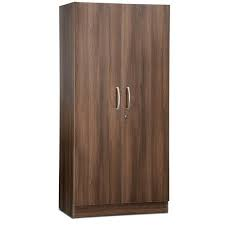

In [29]:
# Load the trained model
model = YOLO("yolov8n_trained.pt")  # Make sure this is the correct path to your model file

# Perform inference on the uploaded image
results = model.predict("cabinet.jpeg")  # Use the name of your uploaded image file

# Display results
result = results[0]  # Access the first result
result.show()  # This will show the image with bounding boxes

# Step 7: Get detected objects
detected_objects = result.boxes.xyxy  # Get detections in xyxy format
confidences = result.boxes.conf  # Get confidences
classes = result.boxes.cls  # Get class indices

# Step 8: Prepare a summary of detected objects
summary = []
for i in range(len(detected_objects)):
    label = model.names[int(classes[i])]  # Convert class index to label
    confidence = confidences[i].item()  # Get confidence as a float
    summary.append(f"Detected {label} with confidence {confidence:.2f}")

# Combine the summary into a single string
summary_text = " ".join(summary) if summary else "No objects detected."

# Step 9: Use text-to-speech to read out the summary
def text_to_speech(text, filename='output.mp3'):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)
    return filename

audio_file = text_to_speech(summary_text)
audio = Audio(audio_file, autoplay=True)

# Step 10: Play the audio
display(audio)  # Display the audio widget